<a href="https://colab.research.google.com/github/piusAI/AllAboutDL/blob/main/section04_01_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values


.iloc :  Extract entire data frame

In [6]:
print(type(dataset.iloc[:,3:-1]))

<class 'pandas.core.frame.DataFrame'>


.values를 잡아주지 않으면 그냥 Pandas.dataFrame이 나옴

Pandas DataFrame : row-column으로의 table Data

In [7]:
print("Feature:\n", X)

print("\n Leave Parm: \n", y)

Feature:
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]

 Leave Parm: 
 [1 0 1 ... 1 1 0]


Label = Leave Param을 예측하기 위한 Classification

고객이 빠져나가는지 확인하기 위해!

### Encoding categorical data

Label Encoding the "Gender" column

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2]) # Exchange Female:0, Male:1

LabelEncoder

Male, Female과 같은 string=> int

| 메서드               | 하는 일                                                            | 예시                              |
| ----------------- | --------------------------------------------------------------- | ------------------------------- |
| `fit()`           | 데이터에서 변환 기준을 **학습**  | `['Male', 'Female']` → 매핑 기억만 함 |
| `transform()`     | **이미 학습한 기준으로 변환만 수행**                                          | `['Male', 'Female']` → `[1, 0]` |
| `fit_transform()` | 위 두 과정을 **한 번에 처리** (학습 + 변환)                                   | `['Male', 'Female']` → `[1, 0]` |

-> fit은 그냥 string -> int이상의 의미를 가짐.

알아서 어떤 기준을 갖고 기계가 스스로 결정!

In [9]:
print(X[:,2])

[0 0 0 ... 0 1 0]


In [10]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

from sklearn.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encorder', OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [12]:
print(ct.fit_transform(X)) #보통 sparese matrix로 나오기도해서

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]


<Preprocess, Template 활용해서>

Geopgraphy, 지역을 one-hot code로 수정함

In [13]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Standard Scaler!

- 특성 1: 나이 = [20, 30, 40]
- 특성 2: 연봉 = [30,000,000, 60,000,000, 100,000,000]

이렇게 각각의 Feature Scale의 차이를 없애주는것


```
# X_scaled = (X - 평균) / 표준편차

```



| 특성 | 평균  | 표준편차 | 스케일링 결과              |
| -- | --- | ---- | -------------------- |
| 나이 | 30  | 10   | \[-1, 0, 1]          |
| 연봉 | 63M | 29M  | \[-1.14, -0.1, 1.24] |


-> Train data에만 standardscaler해주기!

## Part 2 - Building the ANN

### Initializing the ANN

In [16]:
ann = tf.keras.models.Sequential()
# integrated Keras, into tf

Sequence Layer를 활용해서 OutputLayer까지 차례로 이어짐

TwoLayerNet에서 작업했던 이 짓을 한번만에 처리 가능!

```
  self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
  self.params['b1'] = np.zeros(hidden_size)
  self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
  self.params['b2'] = np.zeros(output_size)

def predict(self, x)
a1 = np.dot(x, W1) +b1
z1 = sigmoid(a1)
a2 = np.dot(z1, W2) + b2
y = softmax(a2)

return y
```

이렇게 하나씩 처리했던 과정을
tf를 활용하면

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(units = 50, activation='sigmoid', input_shape=(784, )), Dense(units = 10, activation = 'softmax')])

model.summary()

#얘는 실행하지말기

이렇게 처리 가능!!

### Adding the input layer and the first hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

- Dense : FCL
- unit : hidden Neuron

| 수동 구현 (NumPy 등)                | Keras 코드 (`Dense`)   |
| ------------------------------ | -------------------- |
| `input_size = 784`             | `input_shape=(784,)` |
| `hidden_size = 50`             | `units=50`           |
| `activation=sigmoid` 또는 `relu` | `activation='...'`   |


### Adding the second hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [19]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

=> Regression하면 최종적으로 연속적인 실수 예측해야해서 Activation 함수 안했다

왜 Exit [0.08, 0.92] 이런식으로 아닌가?
One-hot Label과 softmax일때여야하는데 잘 활용 ❌

```
Dense (units=2, activation='softmax')
```




| 방식                    | 설명                                                                          |
| --------------------- | --------------------------------------------------------------------------- |
| `units=1` + `sigmoid` | → 0\~1 사이의 확률값 하나 출력<br>→ 이 확률이 "클래스 1일 확률"이라고 간주<br>→ `>0.5`면 클래스 1, 아니면 0 |
| `units=2` + `softmax` | → 확률 벡터 `[0.2, 0.8]`처럼 두 개 출력<br>→ 다중 클래스(3개 이상)일 때 사용하거나, 일부 모델 구조에서 사용    |


## Part 3 - Training the ANN

### Compiling the ANN

Optimizer?

In [20]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'] )

| Loss 이름                           | 사용 조건            | 예측 값 (`y_pred`)                | 정답 레이블 (`y`)                      | 특징             |
| --------------------------------- | ---------------- | ------------------------------ | --------------------------------- | -------------- |
| `binary_crossentropy`             | **클래스 2개 (0/1)** | `float` (0\~1, sigmoid 출력)     | 0 or 1 (또는 \[1,0]/\[0,1] one-hot) | sigmoid와 함께 사용 |
| `categorical_crossentropy`        | **클래스 3개 이상**    | `[0.1, 0.3, 0.6]` (softmax 출력) | `[0, 0, 1]` (one-hot vector)      | softmax와 함께 사용 |
| `sparse_categorical_crossentropy` | **클래스 3개 이상**    | `[0.1, 0.3, 0.6]`              | `2` (정수 형태 라벨)                    | one-hot 안 써도 됨 |


Binary를 활용하여서 Classification!

2개 이상의 Output이라면, SoftMax로 activation function!

- adam algorithm : stochastic Desncent Gradient
- MSE 로 loss function잡음

### Training the ANN on the Training set

In [21]:
ann.fit(X_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6264 - loss: 0.6786
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7881 - loss: 0.4935
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7993 - loss: 0.4478
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7953 - loss: 0.4411
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7960 - loss: 0.4423
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8245 - loss: 0.4137
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8150 - loss: 0.4185
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8235 - loss: 0.4157
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8282 - loss: 0.4113
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8267 - loss: 0.4126
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8273 - loss: 0.4072
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [37]:
print(ann.predict(sc.transform([[1,0,0,600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.03023353]]


train에서 fit_transform()으로 int + 표준편차 했지만

test에서는 Transform을 활용해서 표준편차에 맞게끔 또 다시 감싸줘야함!

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

#### ann.predict( [[ ]] )

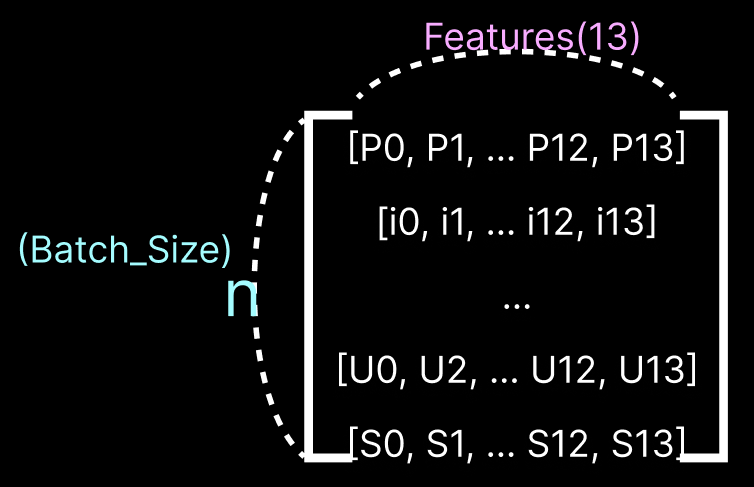

batch 단위로 받기때문에
n X numClass(Feature)이다

[ 1,0,0, ..., 5000 ] ❌ (13,)

[[1,0,0, ..., 5000 ]] ✅ (1,13)

In [38]:
print(ann.predict(sc.transform([[1,0,0,600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))>0.5)
#0.5 이상이면 떠나는거니까 이렇게도 가능

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[False]]


- 01 2D 배열로 쌍 bracket
- 02 Dummy(int) Variable, Geopgraphy
- 03 sc.transform으로의 스케일링!

### Predicting the Test set results

In [49]:
y_pred = ann.predict(X_test)
y_pred =(y_pred>0.5) #Boolean값으로 변형
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), 1))
# concatenate : attach array
## axis=1로, rows로 붙힌다 : i x n

# reshape으로 (1000,) => (1000,1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1496   99]
 [ 183  222]]


0.859

새로운 Test, Y에 넣었을때
0.859정도 나옴!
